# TP de Méthodes Numériques :
# Algorithme de réaction-diffusion pour la détection de la neige par satellite

### Equipe :

#### Zouggari Samy G2

#### Houlès Sacha G2


#### Résumé :
Dans ce TP, on simule une équation de réaction-diffusion à l'aide d'un schéma aux différences finies.
L'équation est de type bistable, i.e. possède deux états d'équilibres stables spatialement homogènes.
La dynamique est appliquée à des images satellites radar (SAR) afin d'y délimiter des zones de neige
(problématique de segmentation d'image), et les résultats sont comparés à des mesures optiques satellitaires.
<br>
<br>

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

Les lectures des données utilisées dans le TP
(mesures SAR, optiques, données d'altitude) 
s'effectuent avec l'instruction :
<br>
**u = np.loadtxt("fname",delimiter=',')**
<br>
où **fname** est le nom d'un fichier texte contenant des données et
**u** un tableau.
<br>
<br>

### Partie 1 : codage et test de l'algorithme de réaction-diffusion

#### Question 1 
Ecrire une fonction **laplacien** qui prend en argument une matrice 
$(u_{i,j})$ (tableau 2D) de dimension $(m,n)$ arbitraire et calcule son laplacien discret
avec conditions aux limites de Neumann homogènes :
$$
{(\Delta_d{u})}_{i,j} =
u_{i+1,j}   +u_{i-1,j} + u_{i,j+1} +u_{i,j-1} -4\, u_{i,j},
\quad
0\leq i \leq m-1 , 0\leq j \leq n-1 ,
$$
où on note
$u_{-1,j}=u_{0,j}$, 
$u_{m,j} = u_{m-1,j}$, 
$u_{i,-1} = u_{i,0}$,
$u_{i,n} = u_{i,n-1}$.

Suggestion : on pourra utiliser la fonction **numpy.pad**
pour prendre en compte ces conditions aux limites.

#### Réponse :

In [45]:
def laplacien(u):
    m,n=u.shape
    delta=np.zeros((m,n))
    for i in range(1,m-1):
        for j in range(1,n-1):
            delta[i][j]=u[i+1][j] + u[i-1][j] + u[i][j+1] + u[i][j-1] - 4*u[i][j]

    vecteur_haut=[0]+[u[1][j]+u[0][j+1]+u[0][j-1]-3*u[0][j] for j in range(1,n-1)]+[0]
    vecteur_bas=[0]+[u[m-2][j]+u[m-1][j+1]+u[m-1][j-1]-3*u[m-1][j] for j in range(1,n-1)]+[0]
    vecteur_gauche=[u[1,0]+u[0][1]-2*u[0][0]]+[u[i+1][0]+u[i-1][0]+u[i][1]-3*u[i][0] for i in range(1,m-1)]+[u[m-2][0]+u[m-1][0]-2*u[m-1][0]]
    vecteur_droit=[u[1][n-1]+u[0][n-2]-2*u[0][n-1]]+[u[i+1][n-1]+u[i-1][n-1]+u[i][n-2]-3*u[i][n-1] for i in range(1,m-1)]+[u[m-2][n-1]+u[m-1][n-2]-2*u[m-1][n-1]]

    delta[0]=vecteur_haut
    delta[-1]=vecteur_bas
    delta[:,0]=vecteur_gauche
    delta[:,-1]=vecteur_droit

    return delta


#### Question 2
On considère une équation de diffusion avec conditions aux limites de Neumann homogènes,
discrétisée par le schéma d'Euler explicite :
<br>
pour $0\leq i \leq m-1$, $0\leq j \leq n-1$, $k \geq 0$ :
$$
u_{i,j}^{(k+1)}
=
\mu\, \big( u_{i+1,j}^{(k)}   +u_{i-1,j}^{(k)} + u_{i,j+1}^{(k)} +u_{i,j-1}^{(k)} -4\, u_{i,j}^{(k)} \big) 
+u_{i,j}^{(k)},
$$
avec conditions aux limites
$u_{-1,j}^{(k)}=u_{0,j}^{(k)}$,
$u_{m,j}^{(k)}=u_{m-1,j}^{(k)}$,
$u_{i,-1}^{(k)} = u_{i,0}^{(k)}$,
$u_{i,n}^{(k)}=u_{i,n-1}^{(k)}$.
<br>
On a $\mu = \frac{D\, \Delta{t}}{h^2}$, où $D>0$ est le coefficient de diffusion,
$\Delta t >0$ le pas de temps et $h$ le pas d'espace.

#### 2-a )
Montrer que la moyenne des composantes
$$
\bar{u}^{(k)}= \frac{1}{m\, n}\sum_{0\leq i \leq m-1 , 0\leq j \leq n-1}{u_{i,j}^{(k)}}
$$
est indépendante de $k$.

#### Réponse 
soit $k\geq0$.

$\overline{u}^{(k)}=\frac{1}{mn} \sum_{0 \leq i\leq m-1} \sum_{0\leq j\leq n-1}u_{i,j}^{(k)} \\~\\
=\frac{1}{mn} \sum_{0 \leq i\leq m-1} \sum_{0\leq j\leq n-1}(u_{i,j}^{(k-1)}+\mu(\Delta_{d}u)_{i,j}^{(k-1)}) \\~\\
= ... \\~\\ = \frac{1}{mn} \sum_{0 \leq i\leq m-1} \sum_{0\leq j\leq n-1}(u_{i,j}^{(0)}+\mu\sum_{l=0}^{k-1}(\Delta_{d}u)_{i,j}^{(l)}) \\~\\
=\overline{u}^{(0)}+\frac{\mu}{mn}\sum_{0 \leq i\leq m-1} \sum_{0\leq j\leq n-1}\sum_{l=0}^{k-1}(\Delta_{d}u)_{i,j}^{(l)} \\~\\
=\overline{u}^{(0)}+\mu\sum_{l=0}^{k-1}\overline{\Delta_{d}u}^{(l)} \\~\\
$
Calculons les moyennes des composantes des laplaciens :
$\\$ Soit $0 \leq i\leq m-1, 0\leq j\leq n-1, 0\leq l \leq k-1 \\~\\$
$\overline{\Delta_{d}u}^{(l)}=\frac{1}{mn}\sum_{0 \leq i\leq m-1} \sum_{0\leq j\leq n-1}(u_{i+1,j}^{(l)} + u_{i-1,j}^{(l)} + u_{i,j+1}^{(l)} + u_{i,j-1}^{(l)} - 4*u_{i,j}^{(l)}) \\~\\
\overline{\Delta_{d}u}^{(l)}=\frac{1}{mn}\sum_{0 \leq i\leq m-1} \sum_{0\leq j\leq n-1}\underbrace{(u_{i+1,j}^{(l)}-u_{i,j}^{(l)})}_{u_{m,j}^{(l)}-u_{0,j}^{(l)}} + \underbrace{(u_{i-1,j}^{(l)} - u_{i,j}^{(l)})}_{-u_{m-1,j}^{(l)}+u_{-1,j}^{(l)}}+ \underbrace{(u_{i,j+1}^{(l)} - u_{i,j}^{(l)})}_{u_{i,n}^{(l)}-u_{i,0}^{(l)}}+ \underbrace{(u_{i,j-1}^{(l)} - u_{i,j}^{(l)})}_{-u_{i,n-1}^{(l)}+u_{i,-1}^{(l)}} \\~\\
$
Et, avec les conditions aux limites de Neumann homogènes, $\overline{\Delta_{d}u}^{(l)}=0 \\ $
Enfin, $\overline{u}^{(k)}=\overline{u}^{(0)}$ et la moyenne des composantes de ${u}^{(k)}$ ne dépend pas de k.

#### 2-b )
Ecrire une fonction **diffusion** qui
prend en arguments la condition initiale $(u_{i,j}^{(0)})_{0\leq i \leq m-1 , 0\leq j \leq n-1}$,
le nombre d'itérations $k_{\mathrm{max}}$ et le coefficient $\mu$,
et qui calcule $(u_{i,j}^{(k_{\mathrm{max}})})_{0\leq i \leq m-1 , 0\leq j \leq n-1}$
avec le schéma d'Euler explicite.

In [46]:
def diffusion(u0,k_max,mu):
    laplaciens={}  ## creation d'un dictionnaire vide pour stocker les laplaciens (pour ne pas les recalculer à chaque itération)
    u_dict={} ## creation d'un dictionnaire vide pour stocker les matrices u aux différents temps d'itération (pour ne pas les recalculer à chaque itération)
    def u(k):
        if k==0:
            return u0 ## cas d'arrêt
        elif k-1 in laplaciens and k-1 in u_dict:
            return u_dict[k-1]+ mu*laplaciens[k-1] ## on pioche dans les dictionnaires
        else:
            laplaciens[k-1]=laplacien(u(k-1)) ## si le laplacien n'est pas dans le dictionnaire laplaciens, on le calcule une seule fois et on le stocke
            u_dict[k-1]=u(k-1) ## idem pour les matrices u
            return u_dict[k-1]+ mu*laplaciens[k-1] 

    return u(k_max)

#### 2-c )
On fixe $\mu = 0.2$ et on considère la condition initiale $(u_{i,j}^{(0)})$ correspondant 
aux données d'intensité SAR du fichier "sar.dat"
(avec $m=540$ et $n=532$).
Afficher les images en niveaux de gris correspondant à
$(u_{i,j}^{(k)})$ pour $k=0,10,100,1000$
itérations et commenter. 
Vérifier numériquement la conservation de
la moyenne des composantes
afin de tester la cohérence des calculs.
<br><br>
Pour afficher les images correspondant à 
$(u_{i,j}^{(k)})_{0\leq i \leq m-1 , 0\leq j \leq n-1}$, on pourra utiliser les fonctions
**imshow** ou **pcolormesh**
avec le paramètre **cmap=plt.get_cmap('gray')**,
ainsi que **colorbar** pour indiquer les valeurs.

Lecture de la condition initiale $(u_{i,j}^{(0)})$ :

In [47]:
u0 = np.loadtxt("sar.dat",delimiter=',')

#### Réponse :


k =  0 :
moyenne des coefficients =  -1.2396449541905254 



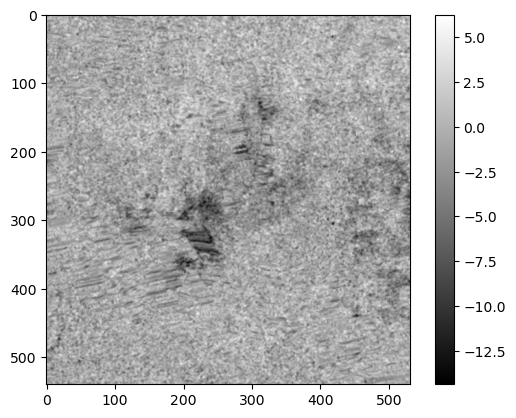

k =  10 :
moyenne des coefficients =  -1.239644567370818 



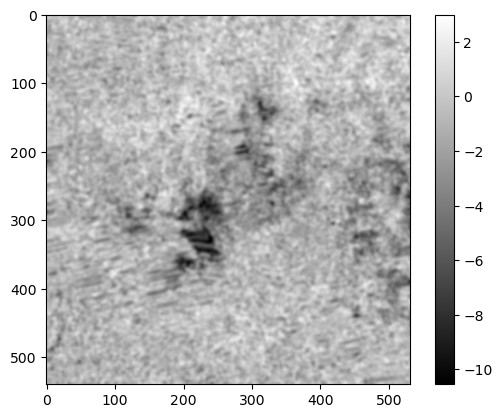

k =  100 :
moyenne des coefficients =  -1.2396437949731312 



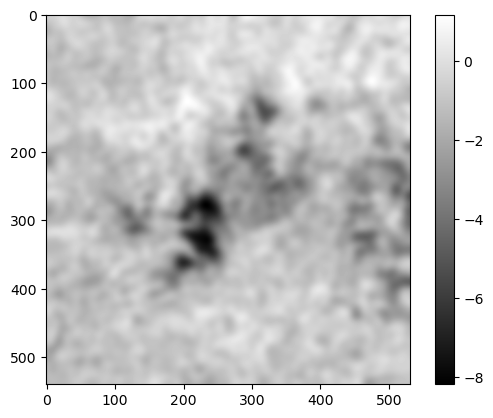

k =  1000 :
moyenne des coefficients =  -1.2396440880898827 



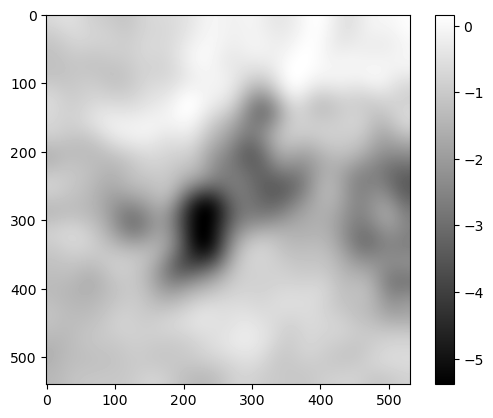

In [48]:
mu=0.2
k_list=[0,10,100,1000]
for k in k_list:
    u_max=diffusion(u0,k,mu)
    print("k = ", k,":\nmoyenne des coefficients = ",np.mean(u_max),"\n")
    plt.imshow(u_max, cmap='gray')
    plt.colorbar()  # Ajoute une barre de couleur pour interpréter les valeurs
    plt.show()

On voit que les valeurs des coefficients se resserrent doucement quand k tend vers l'infini. (on passe de valeurs entre -12.5 à 5 pour k=0, à des valeurs entre 0 et -5 pour k=1000).

On voit aussi que quel que soit k, la moyenne des composantes est très sensiblement la même, ainsi les calculs de la question 2)a) sont cohérents avec les résultats expérimentaux de cette question.

#### Question 3
On considère maintenant la non-linéarité bistable
$$
f(u) = 
\left\{
\begin{array}{rl}
-u-4 & \text{si}\ u<-2,\\
-u & \text{si}\ u\geq -2,
\end{array}
\right.
$$
et le schéma d'Euler explicite pour l'équation de réaction-diffusion associée à $f$ :
<br>
pour $0\leq i \leq m-1$, $0\leq j \leq n-1$, $k \geq 0$ :
$$
u_{i,j}^{(k+1)}
=
\mu\, \big( u_{i+1,j}^{(k)}   +u_{i-1,j}^{(k)} + u_{i,j+1}^{(k)} +u_{i,j-1}^{(k)} -4\, u_{i,j}^{(k)} \big) 
+u_{i,j}^{(k)}
+ \Delta{t}\, f(u_{i,j}^{(k)}),
$$
avec conditions aux limites de Neumann homogènes
$u_{-1,j}^{(k)}=u_{0,j}^{(k)}$,
$u_{m,j}^{(k)}=u_{m-1,j}^{(k)}$,
$u_{i,-1}^{(k)} = u_{i,0}^{(k)}$,
$u_{i,n}^{(k)}=u_{i,n-1}^{(k)}$.

#### 3-a

On suppose que la condition suivante est vérifiée :
$$
\mu < \frac{1-\Delta{t}}{4}
$$
(cette condition implique $\Delta{t} < 1$ puisque $\mu > 0$).
Démontrer les implications :
$$
\big( -2 \leq u_{i,j}^{(0)} \ \forall\, (i,j) \big) \Rightarrow \bigg( \lim_{k\rightarrow +\infty} u_{i,j}^{(k)} = 0 \ \forall\, (i,j) \bigg),
$$
$$
\big( u_{i,j}^{(0)} < -2 \ \forall\, (i,j) \big) \Rightarrow \bigg( \lim_{k\rightarrow +\infty} u_{i,j}^{(k)} = -4 \ \forall\, (i,j) \bigg).
$$


#### Réponse :
Supposons que   $u_{i,j}^{(0)}~<~-2$ pour tout (i,j). On remarque alors avec la relation (8) et en majorant pour tout (i,j) que :
$~~\forall k\geq 0 ~~u_{i,j}^{(k)}~<~-2.\\$
Ainsi comme f est bistable définie dans (6) on a la relation (8) : $\\$
$u_{i,j}^{(k+1)}~=~\mu~(u_{i+1,j}^{(k)}~+u_{i-1,j}^{(k)}~+u_{i,j+1}^{(k)}~+u_{i,j-1}^{(k)}~-4u_{i,j}^{(k)})~+~u_{i,j}^{(k)}~+~\Delta t~f(u_{i,j}^{(k)})\\~\\$
Qui devient : $\\$
$u_{i,j}^{(k+1)}~=~\mu~(u_{i+1,j}^{(k)}~+u_{i-1,j}^{(k)}~+u_{i,j+1}^{(k)}~+u_{i,j-1}^{(k)}~-4u_{i,j}^{(k)})~+~u_{i,j}^{(k)}~-~\Delta t~u_{i,j}^{(k)}~-4\Delta t\\~\\$
Si $u_{i,j}^{(k)}<-4$, le terme $-\Delta t ~u_{i,j}^{(k)}$ est positif et supérieur à $-4\Delta t$, donc augmente la valeur de $u_{i,j}^{(k+1)}$ à chaque itération. Ainsi $u_{i,j}^{(k)}$ va augmenter jusqu'à atteindre une limite et sachant que les termes dans la parenthèse tendent vers 0 à l'infini. Puisque -4 est le seul point fixe on a : 
$\displaystyle\lim_{k->+\infty}~u_{i,j}^{(k)}~=~-4\\$
Si $-2 \leq u_{i,j}^{(k)} \leq -4$ le terme $-\Delta t ~u_{i,j}^{(k)}$ est positif et inférieur à $-4\Delta t$, donc augmente la valeur de $u_{i,j}^{(k+1)}$ à chaque itération. Ainsi $u_{i,j}^{(k)}$ va baisser jusqu'à atteindre une limite et sachant que les termes dans la parenthèse tendent vers 0 à l'infini. Puisque -4 est le seul point fixe on a : 
$\displaystyle\lim_{k->+\infty}~u_{i,j}^{(k)}~=~-4\\~\\$

Supposons maintenant que   $u_{i,j}^{(0)}~\geq~-2$ pour tout (i,j). On effectue le même raisonnement : 
$~~\forall k\geq 0 ~~u_{i,j}^{(k)}~\geq~-2.\\$
Ainsi comme f est bistable définie dans (6) on a la relation (8) : $\\$
$u_{i,j}^{(k+1)}~=~\mu~(u_{i+1,j}^{(k)}~+u_{i-1,j}^{(k)}~+u_{i,j+1}^{(k)}~+u_{i,j-1}^{(k)}~-4u_{i,j}^{(k)})~+~u_{i,j}^{(k)}~+~\Delta t~f(u_{i,j}^{(k)})\\~\\$
Qui devient : $\\$
$u_{i,j}^{(k+1)}~=~\mu~(u_{i+1,j}^{(k)}~+u_{i-1,j}^{(k)}~+u_{i,j+1}^{(k)}~+u_{i,j-1}^{(k)}~-4u_{i,j}^{(k)})~+~u_{i,j}^{(k)}~-~\Delta t~u_{i,j}^{(k)}\\~\\$
Or le terme $-\Delta t ~u_{i,j}^{(k)}$ est positif si $u_{i,j}^{(k-1)}$ est negatif et inversement et ce pour chaque itération. Ainsi $u_{i,j}^{(k)}$ va augmenter ou diminuer (osciller en quelque sorte) autour d'une limite, sachant que les termes dans la parathèses tendent vers 0 à l'infini. Puisque 0 est le seul point fixe on a :
$\displaystyle\lim_{k->+\infty}~u_{i,j}^{(k)}~=~0$

#### 3-b)
Illustrer numériquement les deux implications énoncées dans la question **3-a)**
pour des valeurs de votre choix de $\mu$, $\Delta{t}$, $(m,n)$
et des conditions initiales $u_{i,j}^{(0)}$ tirées au hasard
au dessus ou au dessous de la valeur seuil $-2$
(utiliser la fonction **numpy.random.rand**).

#### Réponse :
<br>

i =  0 :
moyenne des coefficients =  4995.785580318284 



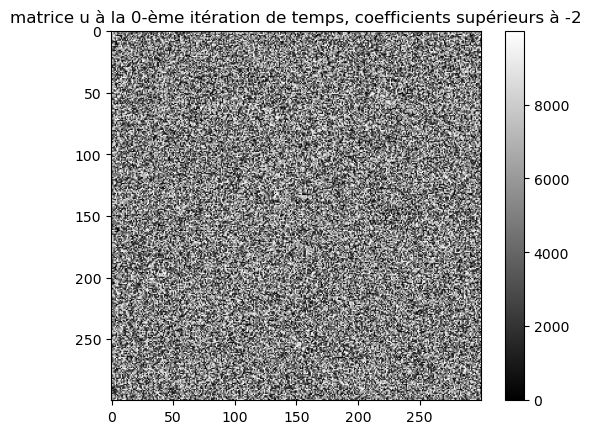

i =  10 :
moyenne des coefficients =  1741.9321544570735 



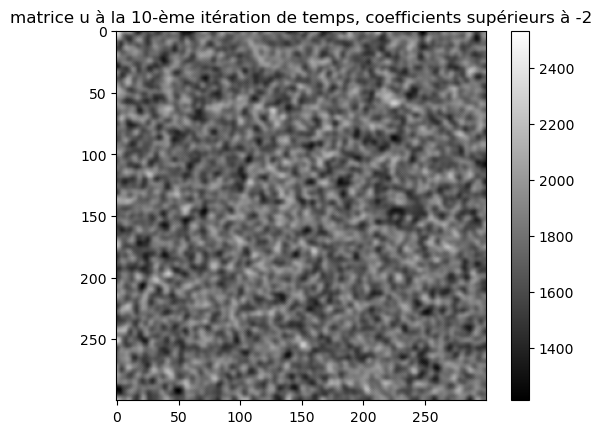

i =  50 :
moyenne des coefficients =  25.747323827969232 



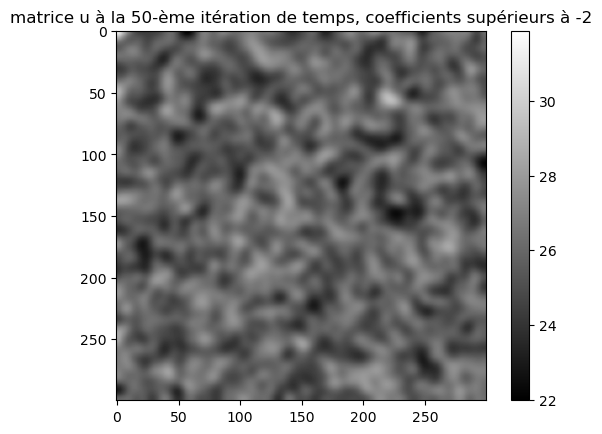

i =  100 :
moyenne des coefficients =  0.13269590318780525 



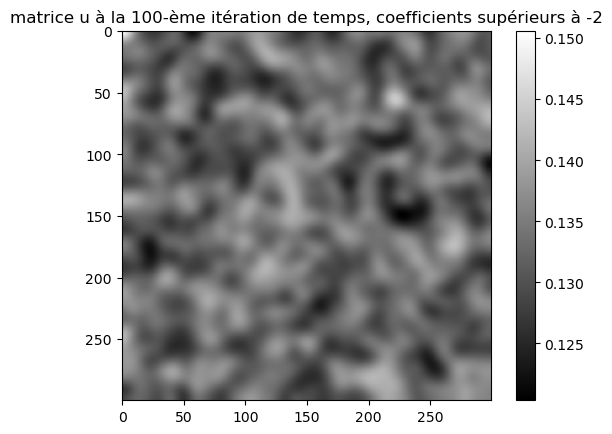

i =  1000 :
moyenne des coefficients =  8.732042588765843e-43 



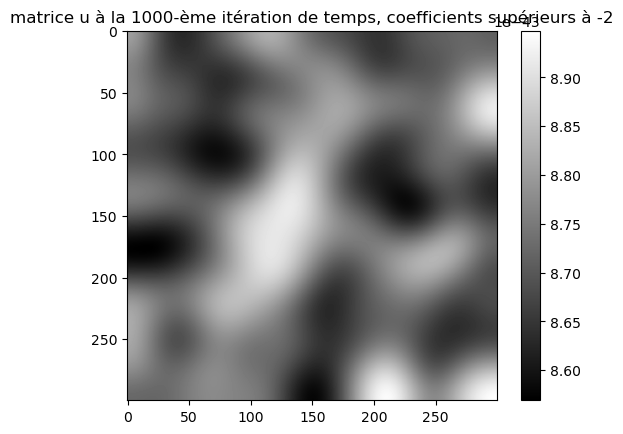

i =  0 :
moyenne des coefficients =  -4987.835281503163 



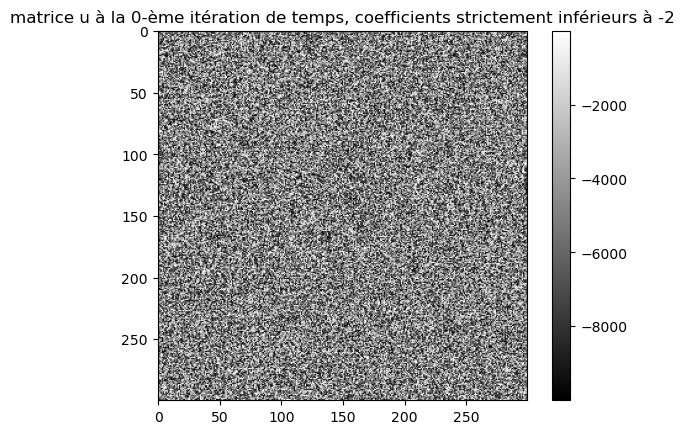

i =  10 :
moyenne des coefficients =  -1741.7417503873726 



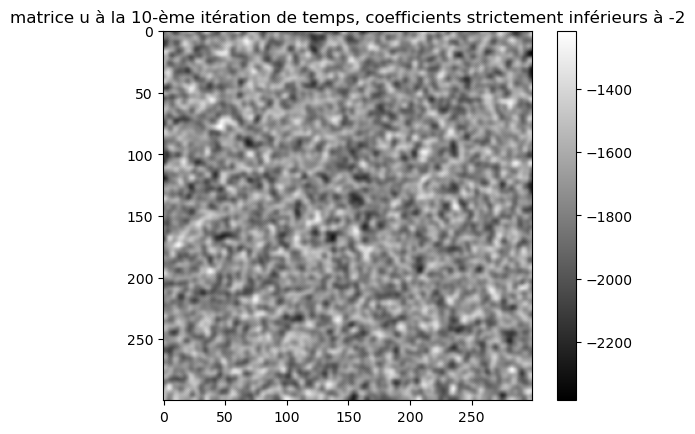

i =  50 :
moyenne des coefficients =  -29.68529252621067 



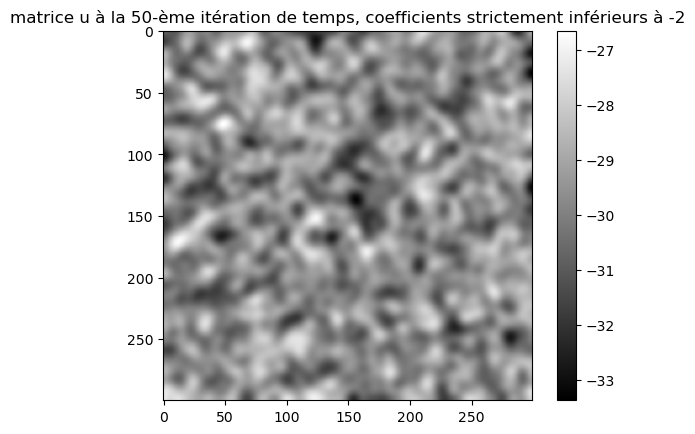

i =  100 :
moyenne des coefficients =  -4.132376195853435 



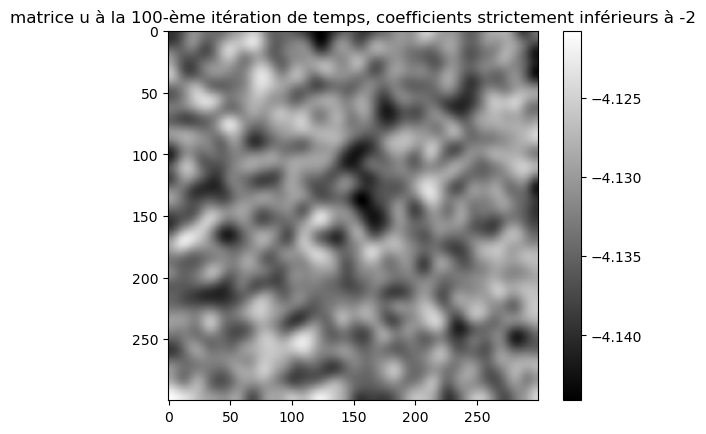

i =  1000 :
moyenne des coefficients =  -4.000000000000001 



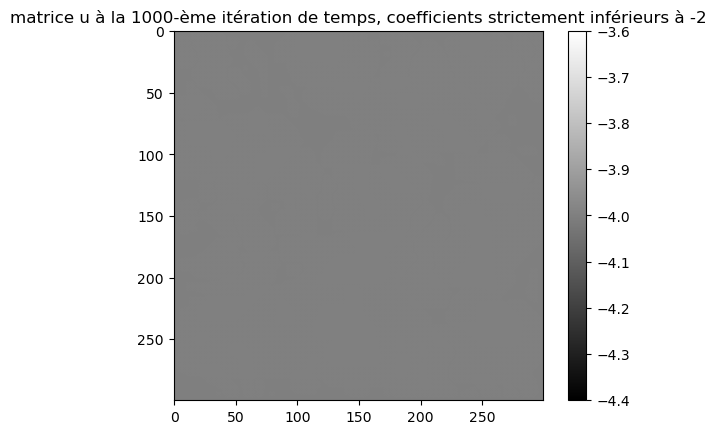

In [49]:
m,n=300,300 

def f(x):
    ## definition de la fonction f conformément à la relation (6)
    if x<-2:
        return -x-4
    else:
        return -x

u=np.zeros((m,n)) 
for i in range(m):
    for j in range(n):
        u[i][j]=random.uniform(-2,10000) ## création d'une matrice avec des valeurs aléatoires au dessus de la valeur seuil -2

u1=np.zeros((m,n))
for i in range(m):
    for j in range(n):
        u1[i][j]=random.uniform(-10000,-2.01) ## création d'une matrice avec des valeurs aléatoires en dessous de la valeur seuil -2

def diffusion_bis(u0,k_max,dt,mu):
    ##idem que la fonction diffusion mais en itérant sur tous les éléments de la nouvelle matrice à cause de l'ajout de la fonction f
    f_vectorise=np.vectorize(f)
    laplaciens={}
    u_dict={}
    m,n=np.shape(u0)
    def u(k):
        u_cour=np.zeros((m,n))
        if k==0:
            return u0
        elif k-1 in laplaciens and k-1 in u_dict:
            u_cour=u_dict[k-1] + mu*laplaciens[k-1] +(dt*f_vectorise(u_dict[k-1]))
        else:
            laplaciens[k-1]=laplacien(u(k-1))
            u_dict[k-1]=u(k-1)
            u_cour=u_dict[k-1] + mu*laplaciens[k-1] +(dt*f_vectorise(u_dict[k-1]))
        return u_cour
    return u(k_max)

k=[0,10,50,100,1000]
dt=0.1
mu=0.2 ## 0.2 < (1-0.1)/4 donc la condition est bien vérifiée
for i in k:
    u_max=diffusion_bis(u,i,dt,mu)
    plt.imshow(u_max, cmap='gray')
    print("i = ", i,":\nmoyenne des coefficients = ",np.mean(u_max),"\n")
    plt.colorbar()  # Ajoute une barre de couleur pour interpréter les valeurs
    plt.title(f'matrice u à la {i}-ème itération de temps, coefficients supérieurs à -2')
    plt.show()
    
for i in k:
    u_max=diffusion_bis(u1,i,dt,mu)
    plt.imshow(u_max, cmap='gray')
    print("i = ", i,":\nmoyenne des coefficients = ",np.mean(u_max),"\n")
    plt.colorbar()  # Ajoute une barre de couleur pour interpréter les valeurs
    plt.title(f'matrice u à la {i}-ème itération de temps, coefficients strictement inférieurs à -2')
    plt.show()

On voit bien grâce à la table des couleurs que tous les coefficients de la matrice tendent vers 0 pour le premier cas, et vers -4 pour les deuxième cas. Ceci est vérifié en calculant la moyenne des coefficients qui, elle aussi, tend vers la valeur voulue.

#### 3-c)
Reprendre les valeurs de $\mu$, $\Delta{t}$, $(m,n)$ de la question **3-b**
avec cette fois des conditions initiales
$u_{i,j}^{(0)}$ tirées au hasard dans $[-10,6[$.
Qu'observez-vous ?

#### Réponse :
<br>

i =  0 :
moyenne des coefficients =  -2.0041738174654187 



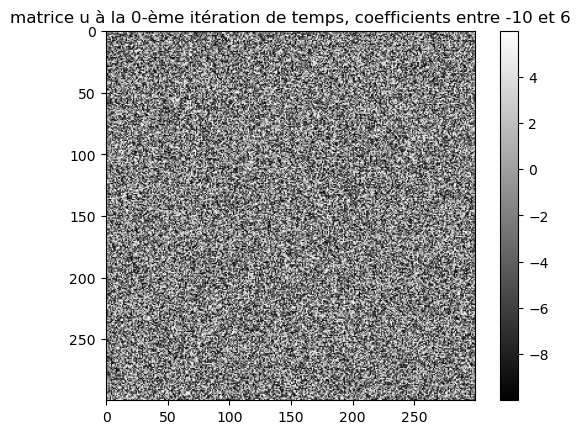

i =  10 :
moyenne des coefficients =  -2.0029566243212535 



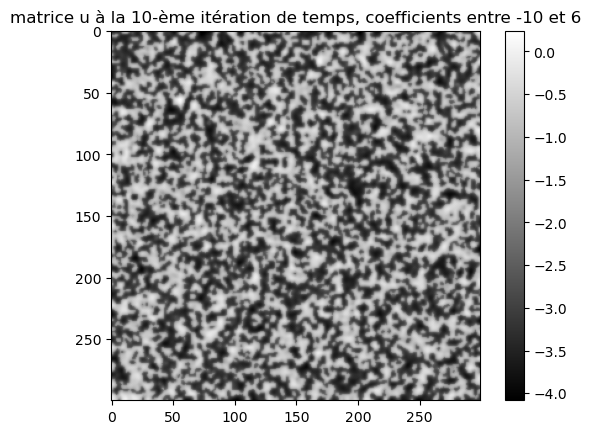

i =  50 :
moyenne des coefficients =  -2.017794707109688 



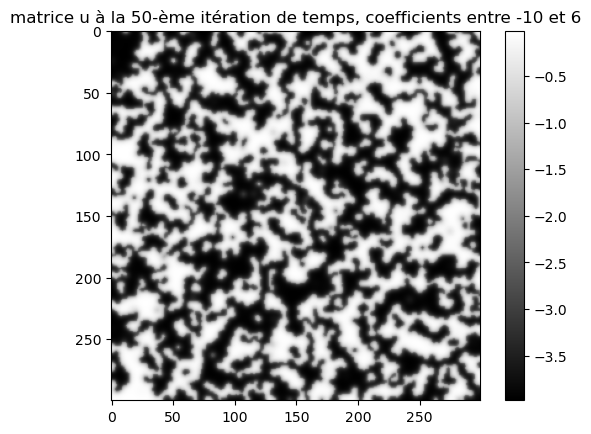

i =  100 :
moyenne des coefficients =  -2.0280693937090066 



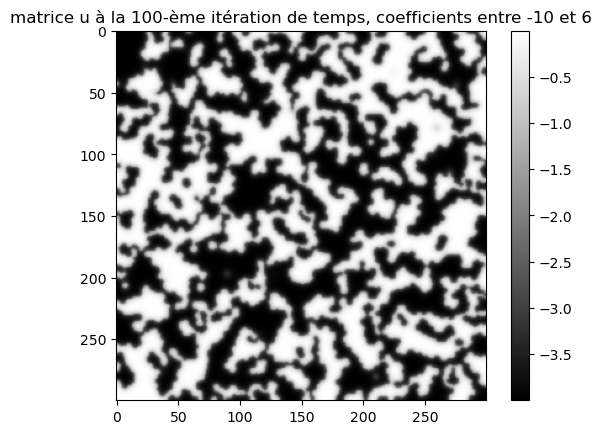

i =  1000 :
moyenne des coefficients =  -2.039599997526761 



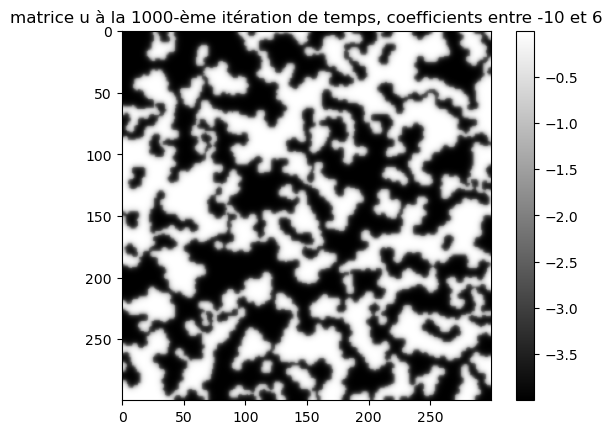

In [50]:
##memes valeurs de dt,mu,m et n qu'à la question précédente
u0=np.zeros((m,n))
for i in range(m):
    for j in range(n):
        u0[i][j]=random.uniform(-10,6)


k=[0,10,50,100,1000]

for i in k:
    u_max=diffusion_bis(u0,i,dt,mu)
    plt.imshow(u_max, cmap='gray')
    print("i = ", i,":\nmoyenne des coefficients = ",np.mean(u_max),"\n")
    plt.colorbar()  # Ajoute une barre de couleur pour interpréter les valeurs
    plt.title(f'matrice u à la {i}-ème itération de temps, coefficients entre -10 et 6')
    plt.show()

On observe une localisation de taches de couleurs différentes. Ce qui montre une localisation de coefficients de même valeur a un même endroit. On observe ainsi la séparation des pixels de l'image en deux classes, commme dit dans l'énoncé, suivant si les coefficients sont supérieurs, ou inférieurs à un certain seuil (ici le seuil vaut -2). Cependant, on observe pas vraiment de convergence vers un des deux états d'équilibre bistable, car on a une partie des coefficients qui tend vers l'un, et une autre partie qui tend vers l'autre état d'équilibre.

On peut voir avec la table des couleurs que l'une des deux classes de coefficients tend vers 0 (en blanc), et l'autre tend vers -4 (en noir).

#### 3-d)
On fixe $\Delta{t}=1$ (la condition $\mu < (1-\Delta{t})/4$ n'est donc pas vérifiée).
Représenter $\| (u_{i,j}^{(k)})  \|_{\infty}= \mathrm{max}_{i,j}|u_{i,j}^{(k)}|$
en fonction de $k$
pour des conditions initiales $u_{i,j}^{(0)}$ tirées au hasard dans $[-2,2[$
et différentes valeurs de $\mu$. Commenter les résultats.

#### Réponse :
<br>

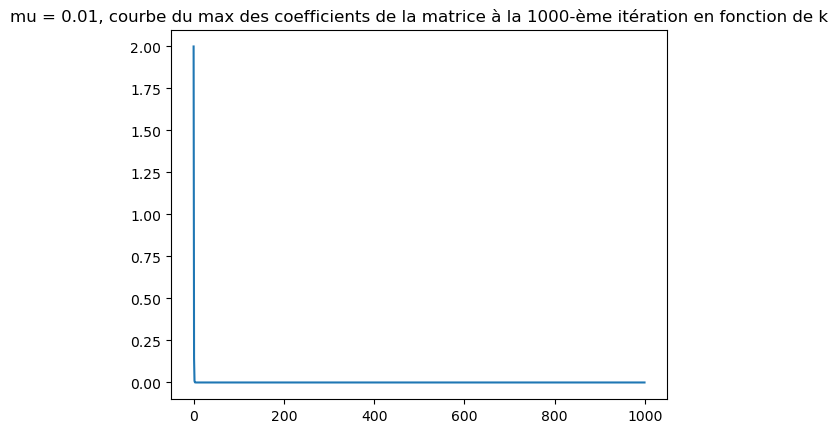

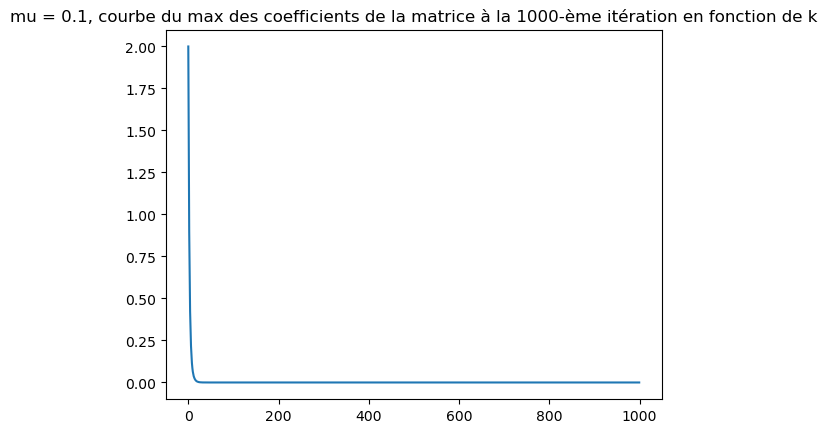

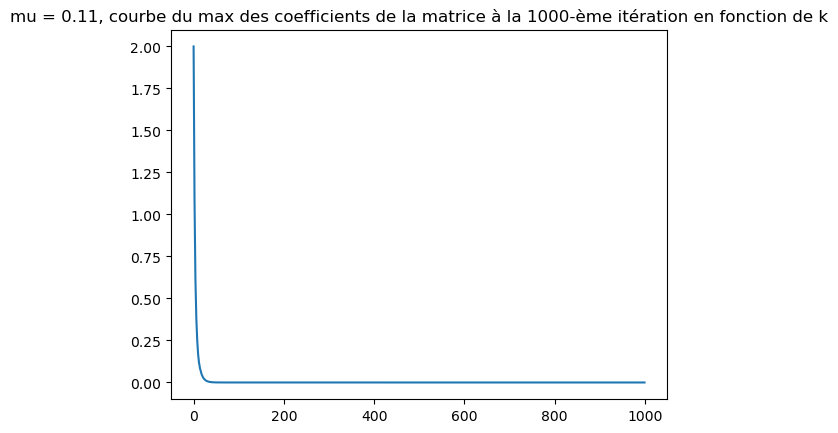

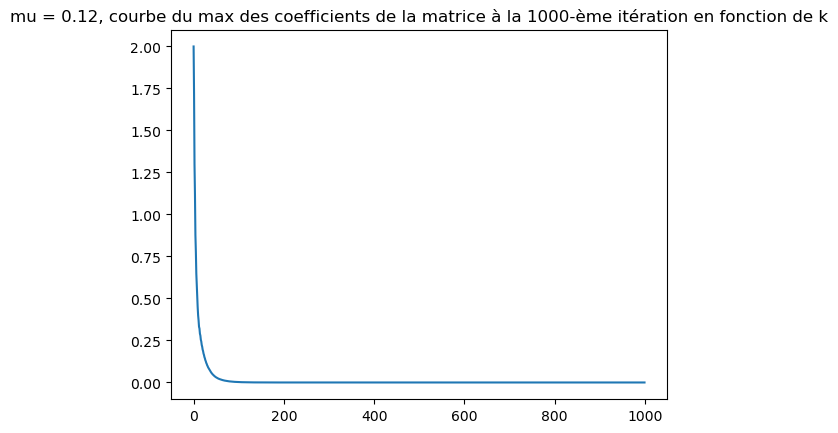

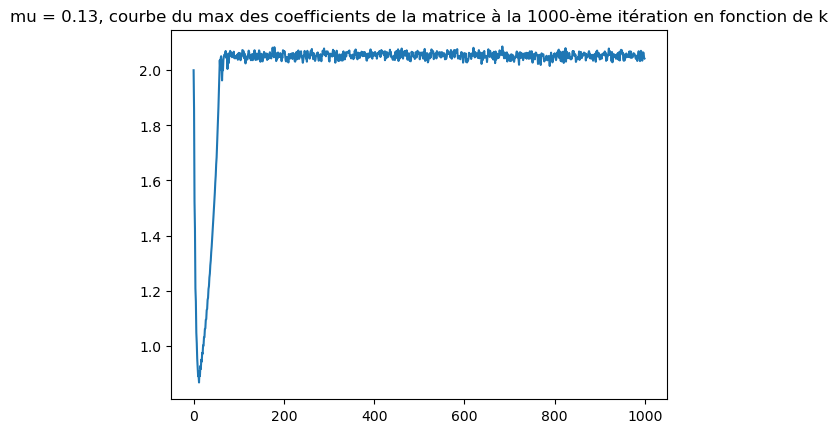

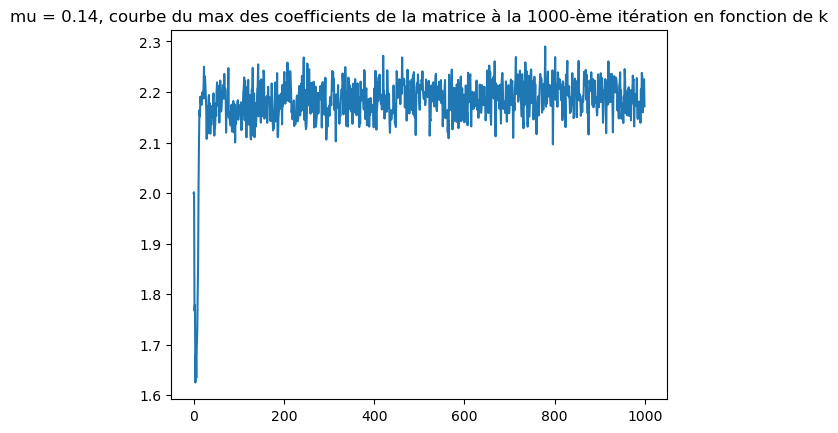

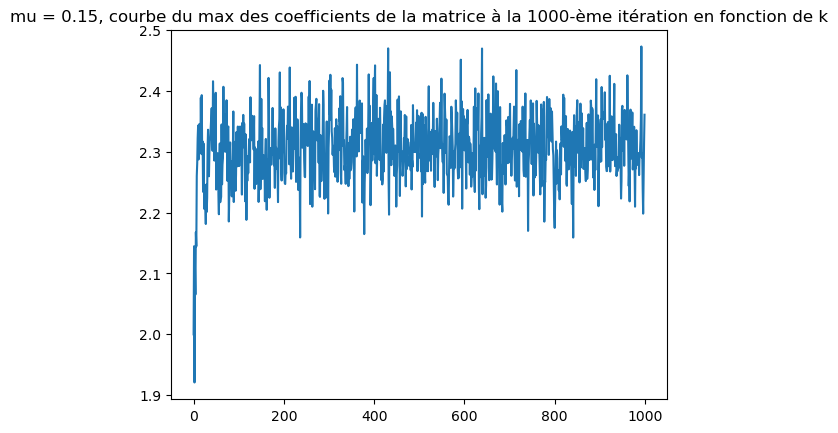

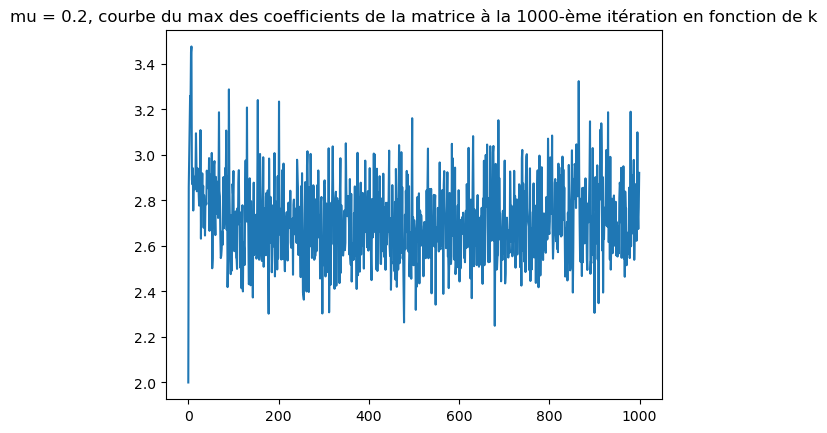

/tmp/ipykernel_21661/1344121734.py:6: RuntimeWarning: overflow encountered in scalar subtract
  delta[i][j]=u[i+1][j] + u[i-1][j] + u[i][j+1] + u[i][j-1] - 4*u[i][j]
/tmp/ipykernel_21661/1344121734.py:6: RuntimeWarning: overflow encountered in scalar multiply
  delta[i][j]=u[i+1][j] + u[i-1][j] + u[i][j+1] + u[i][j-1] - 4*u[i][j]
/tmp/ipykernel_21661/1344121734.py:6: RuntimeWarning: overflow encountered in scalar add
  delta[i][j]=u[i+1][j] + u[i-1][j] + u[i][j+1] + u[i][j-1] - 4*u[i][j]
/tmp/ipykernel_21661/3544745630.py:28: RuntimeWarning: invalid value encountered in add
  u_cour=u_dict[k-1] + mu*laplaciens[k-1] +(dt*f_vectorise(u_dict[k-1]))
/tmp/ipykernel_21661/3544745630.py:24: RuntimeWarning: invalid value encountered in add
  u_cour=u_dict[k-1] + mu*laplaciens[k-1] +(dt*f_vectorise(u_dict[k-1]))
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in f (vectorized)
  outputs = ufunc(*inputs)
/tmp/ipykernel_21661/1344

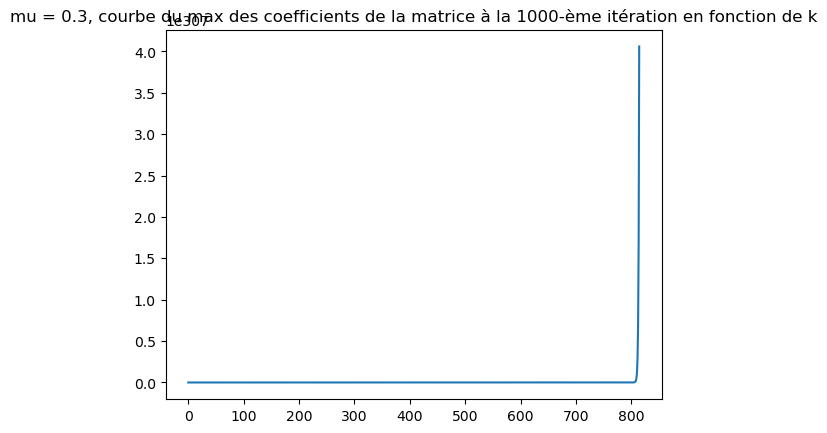

/tmp/ipykernel_21661/1344121734.py:8: RuntimeWarning: overflow encountered in scalar subtract
  vecteur_haut=[0]+[u[1][j]+u[0][j+1]+u[0][j-1]-3*u[0][j] for j in range(1,n-1)]+[0]
/tmp/ipykernel_21661/1344121734.py:9: RuntimeWarning: overflow encountered in scalar subtract
  vecteur_bas=[0]+[u[m-2][j]+u[m-1][j+1]+u[m-1][j-1]-3*u[m-1][j] for j in range(1,n-1)]+[0]
/tmp/ipykernel_21661/1344121734.py:10: RuntimeWarning: overflow encountered in scalar subtract
  vecteur_gauche=[u[1,0]+u[0][1]-2*u[0][0]]+[u[i+1][0]+u[i-1][0]+u[i][1]-3*u[i][0] for i in range(1,m-1)]+[u[m-2][0]+u[m-1][0]-2*u[m-1][0]]
/tmp/ipykernel_21661/1344121734.py:11: RuntimeWarning: overflow encountered in scalar subtract
  vecteur_droit=[u[1][n-1]+u[0][n-2]-2*u[0][n-1]]+[u[i+1][n-1]+u[i-1][n-1]+u[i][n-2]-3*u[i][n-1] for i in range(1,m-1)]+[u[m-2][n-1]+u[m-1][n-2]-2*u[m-1][n-1]]
/tmp/ipykernel_21661/1344121734.py:8: RuntimeWarning: overflow encountered in scalar multiply
  vecteur_haut=[0]+[u[1][j]+u[0][j+1]+u[0][j-1]-3*u

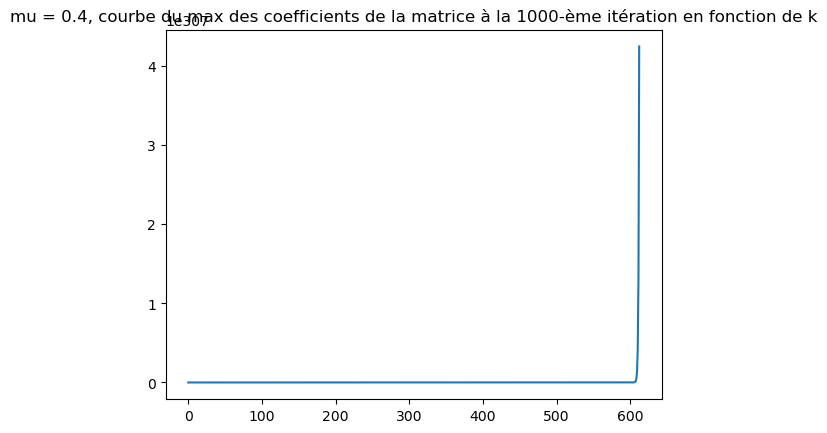

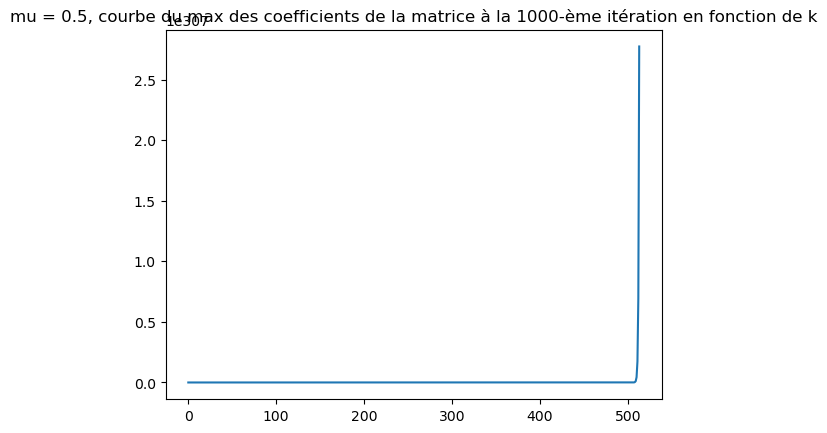

In [ ]:
k=1000
mu_liste=[0.01,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.3,0.4,0.5]
dt=1

m,n=100,100 ## on fait plusieurs courbes coûteuses donc on choisit des dimensions plus petites
u0=np.zeros((m,n))
for i in range(m):
    for j in range(n):
        u0[i][j]=random.uniform(-2,2)
        
def diffusion_ter(u0,k_max,dt,mu):
    ##idem que diffusion_bis mais en calculant la norme infinie des matrices u
    laplaciens={}
    u_dict={}
    liste_max=[] ##initialisation de la liste des ordonnées du graphique qui contiendra les normes infinies des matrices u à chaque itération k
    dt=1
    m,n=np.shape(u0)
    def u(k):
        u_cour=np.zeros((m,n))
        f_vectorise=np.vectorize(f)
        if k==0:
            return u0
        elif k-1 in laplaciens and k-1 in u_dict:
            u_cour=u_dict[k-1] + mu*laplaciens[k-1] +(dt*f_vectorise(u_dict[k-1]))
        else:
            laplaciens[k-1]=laplacien(u(k-1))
            u_dict[k-1]=u(k-1)
            u_cour=u_dict[k-1] + mu*laplaciens[k-1] +(dt*f_vectorise(u_dict[k-1]))
        return u_cour
    
    for i in range(k_max): ##remplissage de liste_max
        u_cour=u(i)
        liste_max.append(np.max(u_cour))
    return liste_max

for mu in mu_liste:
    x=[i for i in range(k)]
    y=diffusion_ter(u0,k,dt,mu)
    plt.plot(x,y)
    plt.title(f"mu = {mu}, courbe du max des coefficients de la matrice à la k-ème itération en fonction de k")
    plt.show()


Commentaire : On s'aperçoit qu'il y a une valeur $\mu_c$ critique, telle que, si $\mu < \mu_c$ alors les normes infinies des matrices tendent vers 0 quand k tend vers l'infini. Sinon, elles tendent vers une autre valeur supérieure à la norme infinie de la matrice u initiale.

Cette valeurs $\mu_c$ se situe entre 0.12 et 0.13.

Il y a aussi une autre valeur $\mu_{cbis}$ telle que pour $\mu_c<\mu<\mu_{cbis}$, les normes infinies des matrices convergent vers une valeur l supérieure à la norme infinie de la matrice u initiale. 
Cette valeur $\mu_cbis$ se situe entre 0.2 et 0.3

Enfin, si $\mu>\mu_{cbis}$, les normes infinies des matrices tendent vers l'infini de façon très rapide

On remarque aussi que lorsque $\mu > \mu_cbis$, plus $\mu$ est grand plus la divergence se fait rapidement. A l'inverse, lorsque $\mu < \mu_c$, plus $\mu$ est petit, plus les coefficients convergent 0 rapidement.

#### 3-e)
Faire une synthèse des résultats précédents, en indiquant les points communs
ou les différences (suivant les valeurs de $\mu$, $\Delta{t}$)
entre les propriétés 
du schéma d'Euler explicite et celles des équations différentielles 
de type réaction-diffusion bistables 
quand $t\rightarrow +\infty$.

#### Réponse :
<br>

$\textbf{Points communs}: \\$ Pour le schéma d'Euler explicite, on a une convergence vers des états bistables qui sont des états d'équilibre, lorsque $t\rightarrow +\infty$. Et l'équilibre atteint est asymptotiquement stable dans les deux cas.

$\textbf{Différences} : \\~\\$ 
Dépendance des paramètres : Pour le schéma d'Euler explicite, la stabilité dépend du paramètre $\mu$, et de la relation $\mu < \frac{1-\Delta{t}}{4}$, et $\Delta t<1$. Des valeurs de $\mu$ trop grandes peuvent entraîner une instabilité numérique (question 3)d)). Pour les équations de réaction-diffusion bistables, la stabilité dépend des propriétés de f et de sa dérivée (propriété 5), et la stabilité ne dépend pas d'autres paramètres tels que $\mu$.

Dépendance au pas de temps : Pour le schéma d'Euler explicite, le pas de temps $\Delta t$ peut affecter la stabilité et la précision de la solution. Pour les équations de réaction-diffusion bistables, le pas de temps $\Delta t$ influence la vitesse à laquelle la solution converge vers l'équilibre, mais il n'a pas d'effet direct sur la nature de l'équilibre atteint.

Discrétisation vs continuité : le schéma d'Euler explicite repose sur la discrétisation du temps et de l'espace pour la résolution des équations différentielles. Cette discrétisation entraîne une erreur d'approximation dont il faut prendre conscience. Cependant, pour les équations de réaction-diffusion bistables sont définies de façon continue dans l'espace et le temps, on a donc pas d'erreur d'approximation.

$\textbf{Conclusion :}$
En résumé, bien que le schéma d'Euler explicite et les équations de réaction-diffusion bistables partagent le fait que la solution converge vers un équilibre lorsque $t\rightarrow +\infty$, il faut prendre des précautions quant aux valeurs des paramètres utilisés pour s'assurer d'une stabilité numérique, car les paramètres dont dépendent la stabilité de ces deux méthodes sont différents.


### Partie 2 : segmentation d'images SAR et comparaison à l'optique

Dans la suite du TP on fixe
$$
\mu = \frac{1-\Delta{t}}{5}
$$
dans le schéma d'Euler explicite décrit dans la **question 3**.

#### Question 4
Ecrire une fonction **segmente** qui
prend en arguments la condition initiale $(u_{i,j}^{(0)})_{0\leq i \leq m-1 , 0\leq j \leq n-1}$,
le pas de temps $\Delta{t}$, un nombre maximal d'itérations $k_{\mathrm{max}}$, une tolérance $\eta$,
et qui renvoie $(u_{i,j}^{(k)})$, 
la matrice $(S(u_{i,j}^{(k)}))$ correspondant à l'image binarisée :
$$
S(u) = 
\left\{
\begin{array}{rl}
1 & \text{si}\ u<-2,\\
0 & \text{si}\ u\geq -2,
\end{array}
\right.
$$
et le nombre d'itérations $k$ réalisé, tels que :
$$
k = \mathrm{min}(k_{\mathrm{cv}},k_{\mathrm{max}}), \quad
k_{\mathrm{cv}} = \inf\{ \, \mathrm{k}\geq 1,\, \| (S(u_{i,j}^{(\mathrm{k})}))-(S(u_{i,j}^{(\mathrm{k}-1)}))  \|_1  \leq \eta \, \},
$$
où $\| \,  \|_1$ correspond à la moyenne des modules des composantes :
$$
\| A  \|_1 = \frac{1}{m\, n}\sum_{0\leq i \leq m-1 , 0\leq j \leq n-1}{|a_{i,j}|}.
$$

In [56]:
u0 = np.loadtxt("sar.dat",delimiter=',')

def calcule_norme1(a,b):
    """fonction qui calcule la norme 1 de la différence de deux matrices"""
    matrice=a-b
    return np.mean(abs(matrice))

def s(u):
    """création de la matrice S conformément à la relation (10)"""
    m,n=np.shape(u)
    a=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            if u[i][j]<-2:
                a[i][j]=1
            else:
                a[i][j]=0
    return a

dt=0.07

def segmente(u0,dt,k_max,eta):
    """meme idée que diffusion_bis mais à la fin on compare les normes 1 des matrices successives (S(u(k))) et (S(u(k-1)))
    """
    mu=(1-dt)/5
    laplaciens={}
    u_dict={}
    m,n=np.shape(u0)
    f_vectorise=np.vectorize(f)
    def u(k):
        u_cour=np.zeros((m,n))
        if k==0:
            u_dict[0]=u0
            return u0
        elif k-1 in laplaciens and k-1 in u_dict:
            u_cour=u_dict[k-1] + mu*laplaciens[k-1] +(dt*f_vectorise(u_dict[k-1]))
        else:
            laplaciens[k-1]=laplacien(u(k-1))
            u_dict[k-1]=u(k-1)
            u_cour=u_dict[k-1] + mu*laplaciens[k-1] +(dt*f_vectorise(u_dict[k-1]))
        return u_cour
    
    u_dict[k_max]=u(k_max) ##on stocke la dernière matrice dans un dictionnaire (et les autres récursivement) pour pouvoir leur appliquer s
    for k in range(k_max,1,-1):
        s_cour=s(u_dict[k])
        s_prec=s(u_dict[k-1])
        norme=calcule_norme1(s_cour,s_prec)
        if norme > eta: 
            return k+1,u_dict[k+1],s(u_dict[k+1]) ## k_cv ici vaut toujours k car k est toujours inférieur ou égal à k_max
    return 1,u_dict[1],s(u_dict[1]) 

#### Question 5
Pour différents pas de temps $\Delta{t}$
(en fixant $k_{\mathrm{max}}$, $\eta$ à votre convenance),
tester la fonction **segmente** sur
l'image SAR en niveaux de gris (fichier de données **sar.dat**)
et commenter les images $(u_{i,j}^{(k)})$ obtenues.

#### Réponse :
<br>

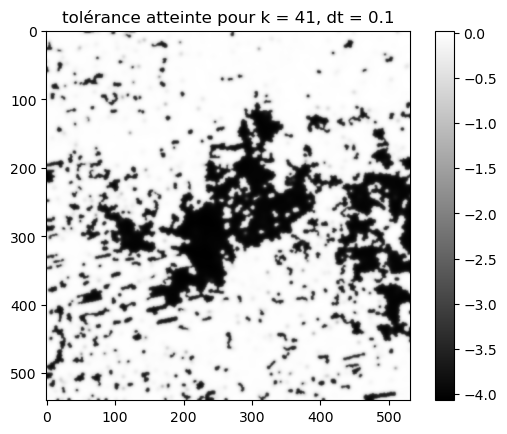

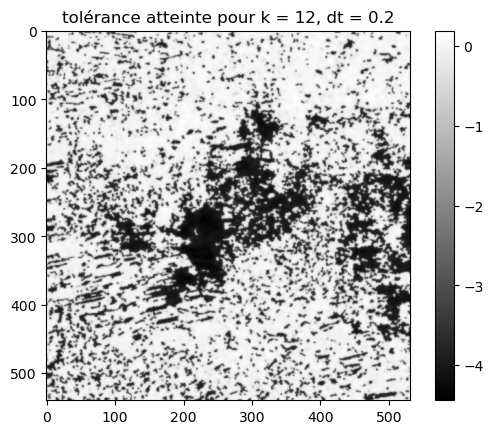

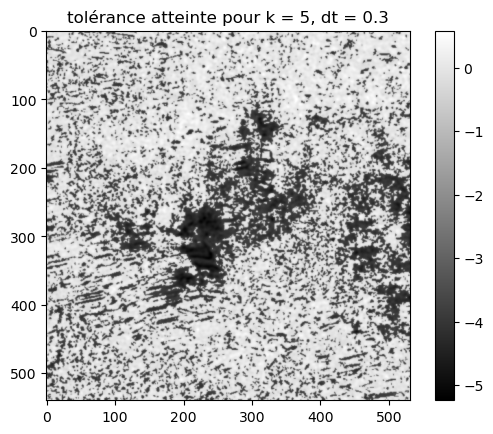

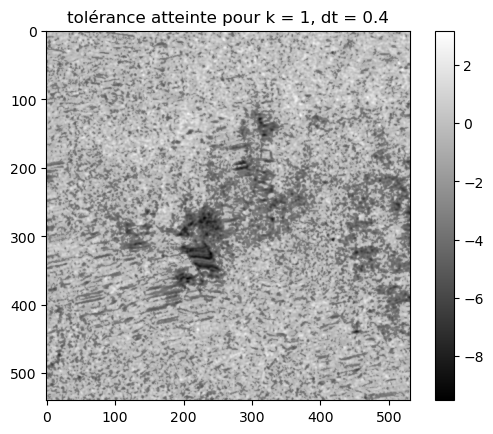

In [57]:
u0 = np.loadtxt("sar.dat",delimiter=',')
dt_list=[0.1,0.2,0.3,0.4]
k_max=50
eta=0.001
for dt in dt_list:
    k,u_k,s_k=segmente(u0,dt,k_max,eta)
    plt.imshow(u_k, cmap='gray')
    plt.title(f"tolérance atteinte pour k = {k}, dt = {dt}")
    plt.colorbar()  # Ajoute une barre de couleur pour interpréter les valeurs
    plt.show()

On observe que plus le pas de temps est petit, plus le nombre d'itérations pour arriver à une convergence des matrices S est grand. Ce qui est cohérent puisque plus le pas de temps est petit, moins les coefficients de la matrice convergent rapidement vers l'état d'équilibre.

De plus, plus le pas de temps est petit, plus les coefficients de la matrice finale sont séparés en deux classes, ce qui est plus intéressant.

#### Question 6
On appelle masque de neige l'ensemble des pixels identifiés comme neige
dans une image satellite.
Dans cette question, nous allons comparer
le masque de neige SAR obtenu par l'algorithme de réaction-diffusion et deux autres masques
dérivés de mesures optiques : ceux des satellites Sentinel-2 et SPOT-6
(dans les images binaires correspondantes, les pixels des zones de neige prennent la valeur $1$ et apparaissent en blanc).
<br><br>
Noter que le SAR est principalement sensible à la neige humide, tandis que l'optique
détecte la neige totale (neige humide et neige sèche située à plus haute altitude dans notre exemple), et que les dates des images
diffèrent légèrement : 
les images optiques SPOT-6 et Sentinel-2 correspondent au $25$ Avril 2018,
et l'image SAR de Sentinel-1 combine deux mesures des $27$ et $28$ Avril 2018.

#### 6-a)
On utilise la fonction **segmente** avec les paramètres
$\Delta{t}=0.07$, $k_{\mathrm{max}}=1000$, $\eta = 10^{-5}$.
L'image binaire $(S(u_{i,j}^{(k)}))$ obtenue constitue le masque de neige SAR.
Comparer (qualitativement et quantitativement)
cette image et les masques de neige optiques
des satellites SPOT-6 
(fichier de données **spot.dat**) et Sentinel-2 (**sentinel2.dat**).

#### Réponse :
<br>

k = 991, dt = 0.07
moyenne des coefficients =  0.1664647730437204 pour le satellite SAR


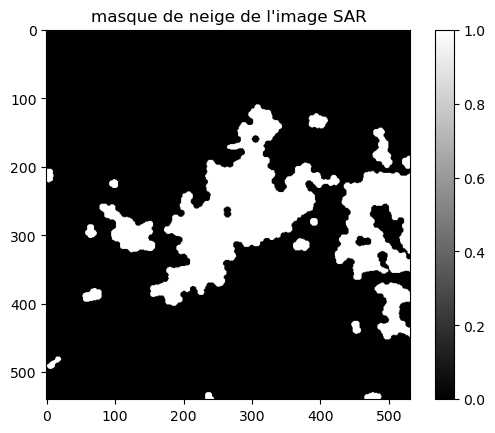

moyenne des coefficients =  0.16191868560289613 pour le satellite SPOT


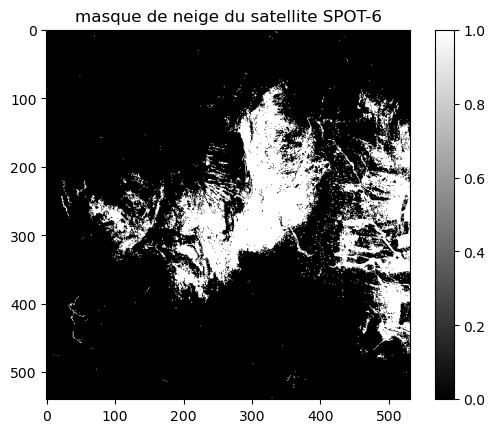

moyenne des coefficients =  0.21046365914786969 pour le satellite SENTINEL2


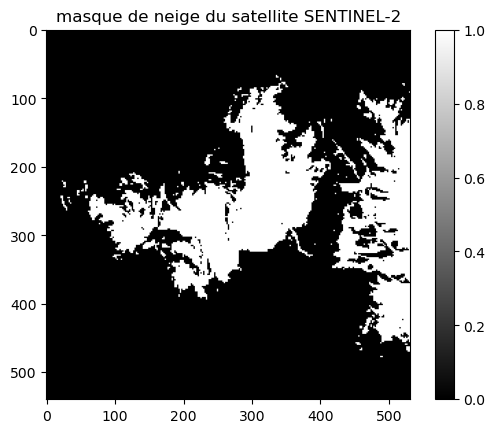

In [58]:
u0 = np.loadtxt("sar.dat",delimiter=',')
s1 = np.loadtxt("spot.dat",delimiter=',')
s2 = np.loadtxt("sentinel2.dat",delimiter=',')

dt=0.07
k_max=1000
eta=1e-5
k,u_k,s_k=segmente(u0,dt,k_max,eta)
plt.imshow(s_k, cmap='gray')
plt.title("masque de neige de l'image SAR")
print(f"k = {k}, dt = {dt}")
print("moyenne des coefficients = ",np.mean(s_k),"pour le satellite SAR")
plt.colorbar()  # Ajoute une barre de couleur pour interpréter les valeurs
plt.show()

plt.imshow(s1, cmap='gray')
plt.title("masque de neige du satellite SPOT-6")
print("moyenne des coefficients = ",np.mean(s1),"pour le satellite SPOT")
plt.colorbar()  # Ajoute une barre de couleur pour interpréter les valeurs
plt.show()

plt.imshow(s2, cmap='gray')
plt.title("masque de neige du satellite SENTINEL-2")
print("moyenne des coefficients = ",np.mean(s2),"pour le satellite SENTINEL2")
plt.colorbar()  # Ajoute une barre de couleur pour interpréter les valeurs
plt.show()



In [69]:
"""Analyse quantitative"""
m,n=np.shape(s_k)
compteur1_3=0
compteur2_3=0
compteur1_2=0
for i in range(m):
    for j in range(n):
        if s_k[i][j]!=s1[i][j]:
            compteur1_2+=1
        if s_k[i][j]!=s2[i][j]:
            compteur1_3+=1
        if s2[i][j]!=s1[i][j]:
            compteur2_3+=1

print(f"Il y a {compteur1_2} coefficients différents entre le masque de neige du satellite SAR et SPOT")
print(f"Il y a {compteur2_3} coefficients différents entre le masque de neige du satellite SPOT et SENTINEL2")
print(f"Il y a {compteur1_3} coefficients différents entre le masque de neige du satellite SAR et SENTINEL2")

Il y a 31410 coefficients différents entre le masque de neige du satellite SAR et SPOT
Il y a 19532 coefficients différents entre le masque de neige du satellite SPOT et SENTINEL2
Il y a 33780 coefficients différents entre le masque de neige du satellite SAR et SENTINEL2


$\textbf{Qualitativement}$ : Avec l'image obtenue par le masque de neige SAR (première figure), on remarque qu'il y a une meilleure condensation des coefficients de la matrice S qui prennent la même valeur.
On observe aussi que le masque de neige optique du satellite SPOT-6 (figure 2) paraît plus réaliste que celui du satellite Sentinel-2 (figure 3). Qui lui paraît plus réaliste que celui du satellite SAR (figure 1).
Cependant, les deux classes de coefficients recouvrent à peu près les mêmes pixels pour les trois masques de neiges.

$\textbf{Quantitativement}$ : Il y a environs 30000 coefficients différents entre le masque de neige de SAR et les autres . Ce qui représente environs 3,5% des coefficients totaux. Cela montre une faible différence entre les masques de neiges. La différence est encore moins marquée entre les deux satellites effectuant des mesures optiques. 

On observe aussi que la moyenne des coefficients est assez différente entre l'image du satellite SENTINEL2 et les autres images, ce qui montre une différence non négligeable dans le pourcentage d'enneigement entre le masque de neige de SENTINEL2 et les autres. Pour les masques de neige SAR et et SPOT6, on observe des moyennes de coefficients proches, ce qui peut indiquer que les données à traiter seront ressemblantes aussi.

#### 6-b)
Pour comparer plus précisément les masques de neige SAR et optiques, 
on s'intéresse aux variations de la couverture neigeuse en fonction de l'altitude.
Les altitudes (exprimées en mètres)
aux différents pixels de l'image sont stockées dans le 
fichier de données **altitudes.dat**.
Tracer une carte couleur des altitudes
incluant quelques courbes de niveau.

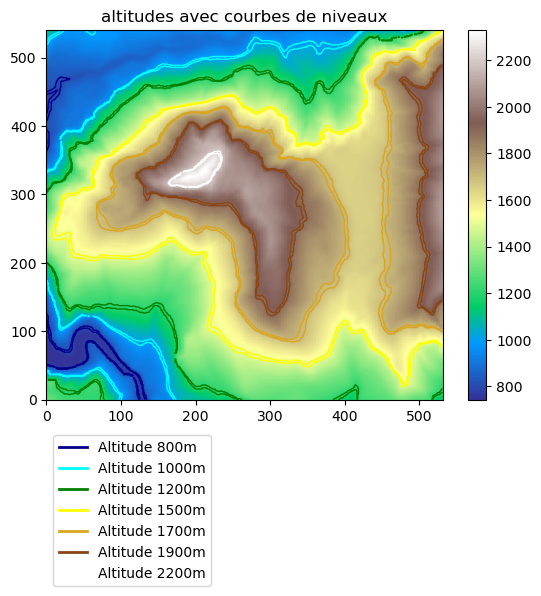

In [70]:
from matplotlib.lines import Line2D
u3=np.loadtxt("altitudes.dat",delimiter=',')
m,n=np.shape(u3)
x=np.linspace(0,n-1,n)
y=np.linspace(0,m-1,m)
X,Y=np.meshgrid(x,y)
Z800=np.zeros((m,n)) 
Z1000=np.zeros((m,n))
Z1200=np.zeros((m,n))
Z1500=np.zeros((m,n))
Z1700=np.zeros((m,n))
Z1900=np.zeros((m,n))
Z2200=np.zeros((m,n))

"""je trace les courbes de niveaux pour chaque altitude en tolérant une différence de + ou - 5m par souci de visibilité"""
for i in range(m):
    for j in range(n):
        if 790<u3[i][j]<810: 
            Z800[i][j]=1
        elif 990<u3[i][j]<1010:
            Z1000[i][j]=1
        elif 1190<u3[i][j]<1210:
            Z1200[i][j]=1
        elif 1490<u3[i][j]<1510:
            Z1500[i][j]=1
        elif 1690<u3[i][j]<1710:
            Z1700[i][j]=1
        elif 1890<u3[i][j]<1910:
            Z1900[i][j]=1
        elif 2190<u3[i][j]<2210:
            Z2200[i][j]=1
            
plt.pcolormesh(u3, cmap='terrain')
plt.title("altitudes avec courbes de niveaux")
plt.colorbar()
plt.contour(X, Y, Z800, levels=[0.5], colors='#00008B', linewidths=1, linestyles='solid')
plt.contour(X, Y, Z1000, levels=[0.5], colors='cyan', linewidths=1, linestyles='solid')
plt.contour(X, Y, Z1200, levels=[0.5], colors='green', linewidths=1, linestyles='solid')
plt.contour(X, Y, Z1500, levels=[0.5], colors='yellow', linewidths=1, linestyles='solid')
plt.contour(X, Y, Z1700, levels=[0.5], colors='#DAA520', linewidths=1, linestyles='solid')
plt.contour(X, Y, Z1900, levels=[0.5], colors='#8B4513', linewidths=1, linestyles='solid')
plt.contour(X, Y, Z2200, levels=[0.5], colors='white', linewidths=1, linestyles='solid')
legend_lines = [
    Line2D([0], [0], color='#00008B', lw=2, label='Altitude 800m'),
    Line2D([0], [0], color='cyan', lw=2, label='Altitude 1000m'),
    Line2D([0], [0], color='green', lw=2, label='Altitude 1200m'),
    Line2D([0], [0], color='yellow', lw=2, label='Altitude 1500m'),
    Line2D([0], [0], color='#DAA520', lw=2, label='Altitude 1700m'),
    Line2D([0], [0], color='#8B4513', lw=2, label='Altitude 1900m'),
    Line2D([0], [0], color='white', lw=2, label='Altitude 2200m')
]
# Ajout de la légende
plt.legend(handles=legend_lines, loc='center left',bbox_to_anchor=(0,-0.3))
plt.show()

#### 6-c)
Ecrire une fonction **probaneige** qui
prend en arguments une altitude $h$ et un masque de neige 
$S=(s_{i,j})_{0\leq i \leq m-1 , 0\leq j \leq n-1}$ ($s_{i,j} \in \{0,1\}$),
et calcule la proportion $P_{S}(h)$ de pixels neige ($s_{i,j} =1$)
parmi les pixels dont les altitudes se situent 
dans l'intervalle $[h-75 , h+75]$.
Tracer (pour les altitudes $800m-2200m$)
les graphes des fonctions $P_{S}(h)$ pour les masques de neige
$S$ de SPOT, Sentinel-2 et du SAR, et commenter les résultats. 

#### Réponse :
<br>

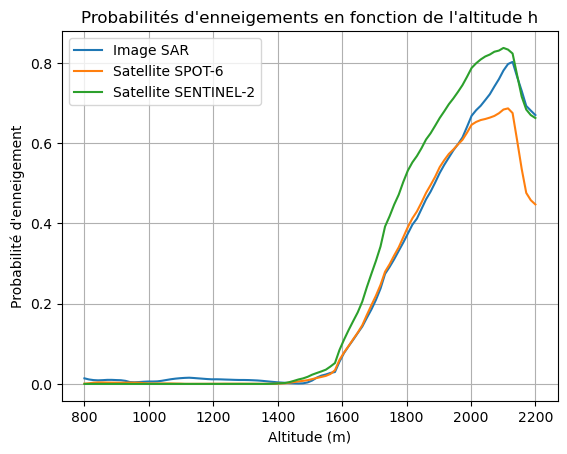

In [71]:
u3=np.loadtxt("altitudes.dat",delimiter=',')
def probaneige(h,S):
    m,n=np.shape(S)
    pixels=0
    pixels_neige=0
    for i in range(m):
        for j in range(n):
            if h-75<=u3[i][j]<=h+75:
                pixels+=1
                if S[i][j]==1:
                    pixels_neige+=1
    return pixels_neige/pixels

S1=np.loadtxt("spot.dat",delimiter=',')
S2=np.loadtxt("sentinel2.dat",delimiter=',')

h=np.linspace(800,2200,100)
y0=[probaneige(i,s_k) for i in h]
y1=[probaneige(i,S1) for i in h]
y2=[probaneige(i,S2) for i in h]

plt.plot(h,y0,label="Image SAR")
plt.plot(h,y1, label="Satellite SPOT-6")
plt.plot(h,y2, label="Satellite SENTINEL-2")
plt.title("Probabilités d'enneigements en fonction de l'altitude h")
plt.xlabel("Altitude (m)")
plt.ylabel("Probabilité d'enneigement")
plt.legend()
plt.grid()
plt.show()

On observe qu'en général, la probabilité d'enneigement est croissante avec l'altitude (cohérent). Cependant, elle diminue lorsque l'altitude devient dupérieure à 2100m (pas très cohérent).

Globalement, les graphiques de la probabilité d'enneigement suivant le masque de neige du satellite SAR, SPOT et SENTINEL2 se ressemblent, avec des maximas plus élevés du côté des masques de neige des satellites SAR et SPOT. Encore une fois, on peut souligner le rapprochement entre le masque de neige de l'image SAR et du satellite SPOT6.

#### 6-d)
En utilisant une fonction **scipy** de votre choix, calculer
pour les masques $S$ de neige SPOT, Sentinel-2 et SAR
l'altitude moyenne d'apparition de la neige $\bar{h}_{S}$ définie par :
$$
P_{S}(\bar{h}_{S})=1/2, \quad P_{S}(h)<1/2 \text{pour tout}\ h< \bar{h}_{S}.
$$
Commenter les résultats obtenus.

#### Réponse :
<br>

In [73]:
#on utilise une méthode par dichotomie

import scipy.optimize as sci

def f0(x):
    return probaneige(x,s_k)-0.5

def f1(x):
    return probaneige(x,S1)-0.5

def f2(x):
    return probaneige(x,S2)-0.5

print(f"altitude moyenne d'apparition de la neige (SAR): {sci.bisect(f0,800,2000)} mètres")
print(f"altitude moyenne d'apparition de la neige (satellite spot-6): {sci.bisect(f1,800,2000)} mètres")
print(f"altitude moyenne d'apparition de la neige (satellite sentinel-2): {sci.bisect(f2,800,2000)} mètres")





altitude moyenne d'apparition de la neige (SAR): 1886.9999999999982 mètres
altitude moyenne d'apparition de la neige (satellite spot-6): 1876.9999999999989 mètres
altitude moyenne d'apparition de la neige (satellite sentinel-2): 1787.9999999999989 mètres


L'altitude moyenne d'apparition de la neige pour le satellite SAR est à peu près la même, que pour le satellite SPOT, et plus grande que pour le satellite SENTINEL2.
Il y a une différence de 1000 mètres entre les altitudes moyennes d'apparition de neige des satellites SAR et SENTINEL2. Ce qui montre une grande incertitude entre les satellites.

On peut conclure que l'utilisation de masque de neige avec une technologie SAR est cohérente avec les images optiques. Les données récoltées avec le masque de neige SAR sont proches de celles récoltées avec le masque de neige du satellite SPOT-6. L'utilisation d'images SAR peut donc être utilisée comme alternative quand on ne peut pas effectuer de mesures optiques.